***CS6482***

***LAB SHEET***

***Exercise***

This code implements tabular Sarsa for the Windy Grid World problem in Chapter 6 of Sutton and BArto Second Edition (2018).

(a) Change the update so that it implements Q Learning.

(b) Change epsioln to 0.5 and run thew code again. What difference does this make?


In [33]:
# Import necessary packages

import numpy as np
import matplotlib.pyplot as plt

In [34]:
# Create the Windy Grid World

# Windy Gridworld is 7 rows by 10 columns
# Each cell has four possible actions: up, down, right, left
num_rows = 7
num_cols = 10
num_actions = 4
action_names = ["up", "down", "right", "left"]

# Define start cell, goal cell, wind strength for each column, and constant reward
# Note: We're treating the top-left cell as (0, 0) and the bottom-right cell as (6, 9)
S_start = (3, 0)
S_goal = (3, 7)
wind_strength = [0, 0, 0, 1, 1, 1, 2, 2, 1, 0]
reward = -1

# Initializ the Q-Learning algorithm parameters (alpha, epsilon, gamma)
alpha   = 0.5 # step size
epsilon = 0.1 # used for e-greedy search
gamma   = 1.0 # discount applied to future rewards (as this is an episodic task, undiscounted is more appropriate)

# Initialize values Q(s, a) arbitrarily
Q = np.random.rand(num_rows, num_cols, num_actions)

# Set Q(T,*) = 0 where T = terminal state
Q[S_goal] = 0

In [35]:
# Choose an action for a given state using e-greedy
def choose_action(State, epsilon):
    A = 0
    if (np.random.rand() < epsilon):
        A = np.random.randint(0, num_actions)
    else:
        A = np.argmax(Q[State])
    return A

# Take an action in a given state
def take_action(State, Action):
    (State_next_row, State_next_col) = State
    if ((Action == 0) or (Action == 1)): # up, down
        State_next_row = min((num_rows - 1), max(0, (State[0] + (1 if (Action == 1) else -1)))) # up=-ve, down=+ve
    elif ((Action == 2) or (Action == 3)): # right, left
        State_next_col = min((num_cols - 1), max(0, (State[1] + (1 if (Action == 2) else -1)))) # left=-ve, right=+ve
    State_next_row = max(0, (State_next_row - wind_strength[State[1]])) # wind is up=-ve
    return (State_next_row, State_next_col), reward

In [36]:
# Setup metrics for Experiment
num_episodes_at_step  = []
num_steps_per_episode = []

In [37]:
# Execute the Sarsa Leaarning algorithm for the Windy Gridworld
def sarsa_windy_gridworld(max_steps):
    global num_episodes_at_step
    global num_steps_per_episode

    num_steps = 0
    num_episodes = 0
    episode_start_step = 0

    # Loop for each episode
    while (num_steps < max_steps):

        State = S_start
        Action = choose_action(State, epsilon)

        # Loop for each step of episode, until S is terminal
        while (State != S_goal):

            # Take action A, observe R, S'
            State_next, Reward = take_action(State, Action)
            Action_next = choose_action(State_next, epsilon)

            # Q(S,A) <- Q(S,A) + alpha*[R + gamma * Q(S',A') − Q(S,A)]
            Q[State][Action] += alpha * (Reward + ( gamma * Q[State_next][Action_next]) - Q[State][Action])

            # S <- S'; A <- A';
            State = State_next
            Action = Action_next

            num_steps += 1
            num_episodes_at_step += [num_episodes]

        num_episodes += 1
        num_steps_per_episode += [num_steps - episode_start_step]
        episode_start_step = num_steps

In [38]:
# Perform the algorithm
sarsa_windy_gridworld(5000)

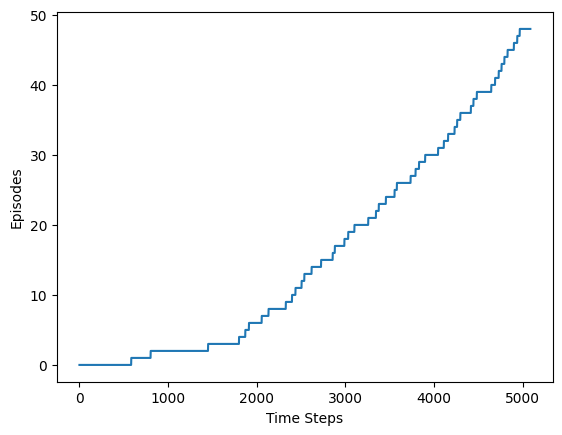

In [39]:
# Plot total Episodes at each Time Step
plt.plot(num_episodes_at_step)
plt.xlabel("Time Steps")
plt.ylabel("Episodes")
plt.show()

***Explanation - for the correct implementation of Sarsa***
The graph above should show that episodes complete faster with increased  training.  This implies that we are progressing towards a faster solution, or faster path through the windy gridworld from start state to goal state.

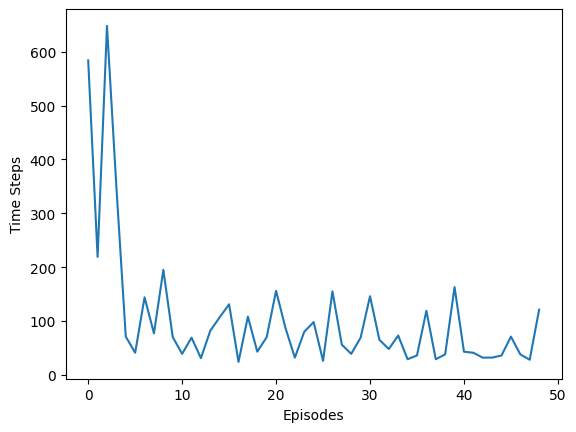

In [40]:
# Plot Time Steps per Episode
plt.plot(num_steps_per_episode)
plt.xlabel("Episodes")
plt.ylabel("Time Steps")
plt.show()

***Explanation -  for the correct implementation of Sarsa***

We can see from the graph above another way of viewing this information.  Here we are looking at the number of time steps taken for each episode, and we can see that it decreases over time. Is it close to the optimal path from start state to finish state of 15 steps.

In [41]:
# Plot most valuable action in each state
A_best = np.argmax(Q, axis=2)
print(A_best)
for i in range (0, num_actions):
    print(i, "=", action_names[i], end="; ")

[[1 1 3 3 2 2 2 2 2 1]
 [1 1 3 1 1 2 0 2 0 1]
 [2 1 1 3 2 2 2 2 1 1]
 [2 1 3 2 2 1 1 0 0 1]
 [2 0 2 1 2 2 0 1 3 3]
 [2 2 2 2 2 1 3 3 3 1]
 [2 2 2 2 3 1 0 2 2 3]]
0 = up; 1 = down; 2 = right; 3 = left; 

***Explanation*- for the correct implementation of Sarsa**

The matrix above shows us what the preferred action is in each state, i.e. the action that we would take with a greedy policy (100% exploitation, 0% exploration).  I had intended to portray this as arrows, but didn't have time to complete this part.

In [42]:
# Find the best route
optimal_route = []
while (True):
    print("Running algorithm...")

    S = S_start
    route = [S]
    while ((S != S_goal) and (len(route) <= 300)): # allow states to be repeated
        A = choose_action(S, 0)
        S, _ = take_action(S, A)
        route += [S]

    if (S == S_goal):
        if (len(optimal_route) == 0):
            print("Found initial route...")
            optimal_route = route
            break;
        elif (len(route) < len(optimal_route)):
            print("Found a better route...")
            optimal_route = route
            break;
        else:
            print("Did not find a better route...")
    else:
        print("Did not find any route... training for another 1000 steps")
        q_windy_gridworld(1000)

Running algorithm...
Did not find any route... training for another 1000 steps
Running algorithm...
Did not find any route... training for another 1000 steps
Running algorithm...
Found initial route...


***Explanation***

In the above algorithm we find the best route computed by q_windy_gridworld().  We do this by using a greedy policy to take the optimal path from start state to goal state.  We repeat this process until we can't find a better (i.e. shorter) route than the best route we have found so far.

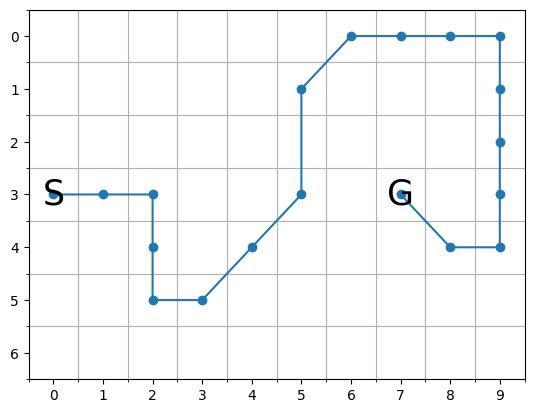

In [43]:
# Plot the optimal route
rows, cols = zip(*optimal_route)
fig, ax = plt.subplots(1)
ax.set_xticks(np.arange(0, num_cols, 1))
ax.set_xticks(np.arange(-0.5, num_cols, 1), minor=True)
ax.set_yticks(np.arange(0, num_rows, 1))
ax.set_yticks(np.arange(-0.5, num_rows, 1), minor=True)
ax.grid(which='minor')
plt.xlim(-0.5, num_cols - 0.5)
plt.ylim(num_rows - 0.5, -0.5)
plt.plot(cols, rows, marker='o')
plt.text(S_start[1], S_start[0], 'S', ha='center', va='center', fontsize=25) # start cell
plt.text(S_goal [1], S_goal [0], 'G', ha='center', va='center', fontsize=25) # goal cell
plt.show()

***Explanation***

In the above graph we plot the best route.  We highlight the start state, S, and the goal state, G. Is the same route highlighted in Sutton and Barto's text. *** Is this an optimal policy?***

***THE END***